# Part 1: Convolutional Neural Network

###  Importing packages

In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential

# dense is fully connected layer
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# keras runs on tensorflow as bakend
from keras import backend as K
from keras.preprocessing import image

# pre-trained model MobileNet (smaller size)
from keras.applications.mobilenet import MobileNet

# pre-processing input used vgg16 and decode
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.models import Model
import timeit

import warnings
warnings.filterwarnings('ignore')

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Preparing Dataset

In [7]:
batch_size = 128
num_classes = 10
epochs = 2

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# channel value will come first or not and reshapping it accordingly
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)   # no. of images, shape of image 28 x 28 , channel 
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Building a Model

In [3]:
model = Sequential()
# input_shape is 28 x 28 x 1 = 784 => no need to flatten the input in CNN.(as it can take input as matrix i.e. the whole input) 
# but in ANN we need to flatten the input.there we require vector as input.
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

### no. of parameters are : #filters * size of filter + bias filter  ###

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                12832     
__________

### Model Training

In [4]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# if verbose = 1 the output to be shown at each layer 
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

# Convolution takes more time during training as it will process sequentially.

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 25s - loss: 1.0435 - acc: 0.6457 - val_loss: 0.2137 - val_acc: 0.9437
Epoch 2/2
60000/60000 [==============================] - 23s - loss: 0.4830 - acc: 0.8459 - val_loss: 0.1562 - val_acc: 0.9557


### Testing

In [5]:
# evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.15621800434440375
Test accuracy: 0.9557


### Prediction

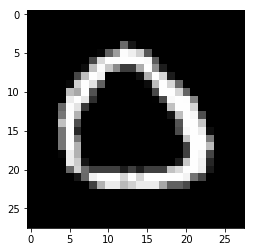

In [8]:
import pylab as plt

plt.imshow(x_test[126:127].reshape(28,28),cmap='gray')
plt.show()

In [9]:
import numpy as np
prediction = model.predict(x_test[126:127])
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:\n',np.where(thresholded == 1)[1][0])

Prediction Score:
 [9.1965616e-01 1.6959838e-04 3.0109197e-02 1.6975310e-02 9.1007882e-05
 3.8243453e-03 2.8794825e-02 7.1761126e-05 2.4955539e-04 5.8227219e-05]

Thresholded Score:
 [1 0 0 0 0 0 0 0 0 0]

Predicted Digit:
 0


# Part 2: Applications of Convolutional Neural Network

###  MobileNet Models

In [9]:
# Transfer Learning
# trained on Imagenet dataset
model = MobileNet(input_shape=None, alpha=0.25, depth_multiplier=1, dropout=1e-3, 
                                 include_top=True, weights='imagenet', input_tensor=None, pooling=None, classes=1000)

# h5 model has pre-defined weights. as its pre-trained model hence its having all layers and everything pre-defined
# model is loaded and seen here
model.summary()

1933312/2108140 [==========================>...] - ETA: 0s_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 8)       216       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 8)       32        
_________________________________________________________________
conv1_relu (Activation)      (None, 112, 112, 8)       0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 8)       72        
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 8)       32        
_________________________________________________________________
conv_dw_1_relu (Ac

###  Classify images

In [10]:
# Write the image name below

img_path = 'Cat.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:\n', decode_predictions(preds))

32768/35363 [==========================>...] - ETA: 0sPredicted:
 [[('n03325584', 'feather_boa', 0.24640976), ('n02098286', 'West_Highland_white_terrier', 0.0548592), ('n02317335', 'starfish', 0.04160265), ('n03884397', 'panpipe', 0.038436204), ('n03388043', 'fountain', 0.035281572)]]


###  Extract CNN features

In [11]:
features = model.predict(x)
print('\nFeature Shape:\n',features.shape)
print('\nFeatures:\n',features)


Feature Shape:
 (1, 1000)

Features:
 [[1.66888469e-06 7.13705842e-04 1.65776597e-04 1.10444133e-04
  1.78130533e-04 4.26024105e-03 3.12953052e-04 1.41131735e-04
  6.23060841e-05 1.60201694e-07 9.00867747e-07 2.61549158e-05
  8.94303980e-07 1.74004290e-05 5.53147001e-05 3.42097360e-06
  2.29536345e-05 1.24992439e-04 2.50077642e-06 7.43016835e-06
  1.03184777e-06 1.27221196e-04 7.50797972e-06 6.57107012e-05
  2.86814952e-06 1.59370063e-06 5.43641363e-05 5.69005824e-05
  3.04485275e-05 3.72158620e-03 6.52512142e-07 4.07435982e-06
  2.95478958e-06 2.60659317e-06 2.85958185e-06 1.32702917e-06
  5.19298328e-06 2.66799589e-07 3.75396165e-04 9.01980638e-06
  9.18596834e-06 7.87482622e-06 1.11574718e-05 4.63034994e-05
  1.34449328e-05 7.70637962e-06 4.13211128e-05 1.56748662e-04
  1.50156950e-07 1.80128027e-05 6.31860094e-05 3.84681043e-04
  1.07686828e-05 4.20531615e-05 2.18739769e-05 2.58908385e-05
  4.34413596e-05 5.82938412e-07 2.88290466e-05 8.68789084e-06
  9.98509131e-06 1.99285751e-06

###  Extract features from an arbitrary intermediate layer

In [13]:
model_minimal = Model(input=model.input, output=model.get_layer('conv_dw_2_relu').output)

conv_dw_2_relu_features = model_minimal.predict(x)
print('Features of conv_dw_2_relu:',conv_dw_2_relu_features.shape)

# one image
# size of image 56 x 56
# channels are 16 


Features of conv_dw_2_relu: (1, 56, 56, 16)


### You can extract these features and use the base network as a feature extractor for your problems. 

# Part 3: Deep Convolution Layer Visualization

In [1]:
import matplotlib as mp
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.contrib.slim as slim
from tensorflow.examples.tutorials.mnist import input_data
import math

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Extract Data

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### Model Building

In [3]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, 784],name="x-in")
true_y = tf.placeholder(tf.float32, [None, 10],name="y-in")
keep_prob = tf.placeholder("float")


## -1 falltens in to 1-D 
## 28 x 28 is image size and 1 is channel 
x_image = tf.reshape(x,[-1,28,28,1])
hidden_1 = slim.conv2d(x_image,5,[5,5])
pool_1 = slim.max_pool2d(hidden_1,[2,2])
hidden_2 = slim.conv2d(pool_1,5,[5,5])
pool_2 = slim.max_pool2d(hidden_2,[2,2])
hidden_3 = slim.conv2d(pool_2,20,[5,5])
hidden_3 = slim.dropout(hidden_3,keep_prob)
out_y = slim.fully_connected(slim.flatten(hidden_3),10,activation_fn=tf.nn.softmax)

cross_entropy = -tf.reduce_sum(true_y*tf.log(out_y))
correct_prediction = tf.equal(tf.argmax(out_y,1), tf.argmax(true_y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

### Training

In [4]:
batchSize = 50
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
for i in range(1001):
    batch = mnist.train.next_batch(batchSize)
    sess.run(train_step, feed_dict={x:batch[0],true_y:batch[1], keep_prob:0.5})
    if i % 100 == 0 and i != 0:
        trainAccuracy = sess.run(accuracy, feed_dict={x:batch[0],true_y:batch[1], keep_prob:1.0})
        print("step %d, training accuracy %g"%(i, trainAccuracy))

step 100, training accuracy 0.4
step 200, training accuracy 0.56
step 300, training accuracy 0.7
step 400, training accuracy 0.72
step 500, training accuracy 0.68
step 600, training accuracy 0.76
step 700, training accuracy 0.86
step 800, training accuracy 0.84
step 900, training accuracy 0.84
step 1000, training accuracy 0.92


### Testing accuracy

In [5]:
testAccuracy = sess.run(accuracy, feed_dict={x:mnist.test.images,true_y:mnist.test.labels, keep_prob:1.0})
print("test accuracy %g"%(testAccuracy))

test accuracy 0.8955


### Get activation values and plotting

In [17]:
def getActivations(layer,stimuli):
    units = sess.run(layer,feed_dict={x:np.reshape(stimuli,[1,784],order='F'),keep_prob:1.0})
    plotNNFilter(units)
    
def plotNNFilter(units):
    filters = units.shape[3]
    plt.figure(1, figsize=(20,20))
    n_columns = 6
    n_rows = math.ceil(filters / n_columns) + 1
    for i in range(filters):
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Filter ' + str(i))
        plt.imshow(units[0,:,:,i], interpolation="nearest", cmap="gray")

### Input Image

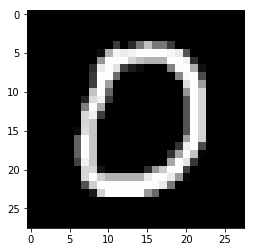

In [19]:
imageToUse = mnist.test.images[10]
plt.imshow(np.reshape(imageToUse,[28,28]), interpolation="nearest", cmap="gray")

### Activation in Layer 1

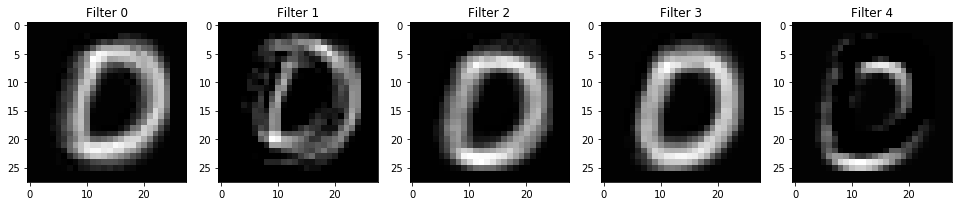

In [21]:
getActivations(hidden_1,imageToUse)

### Activation in Layer 2

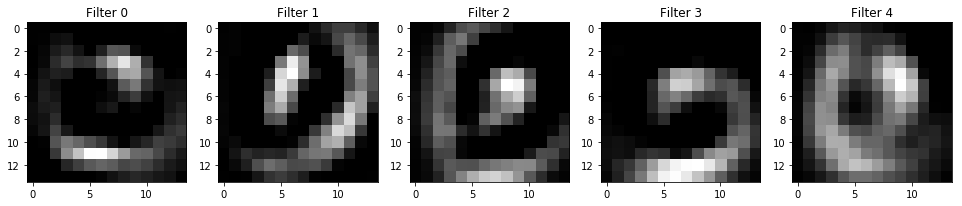

In [22]:
getActivations(hidden_2,imageToUse)

### Activation in Layer 3

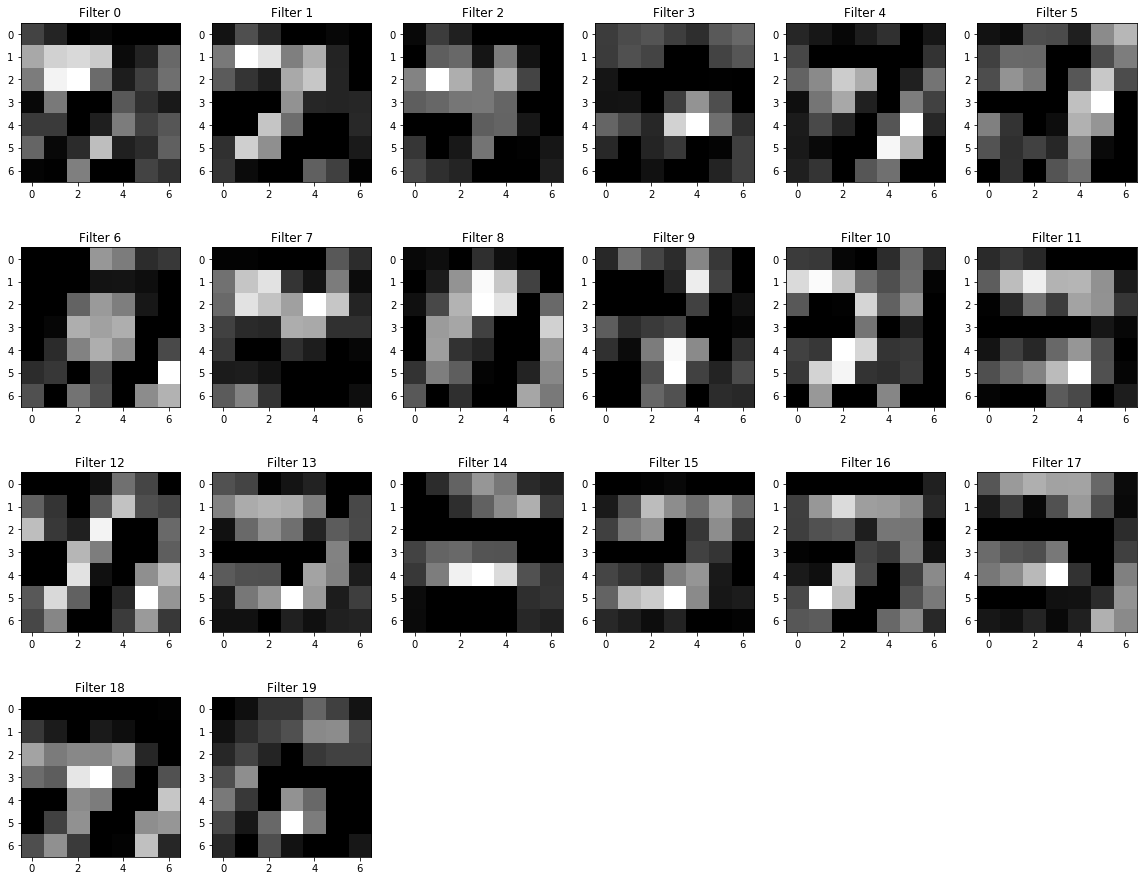

In [23]:
getActivations(hidden_3,imageToUse)

# Part 4: Design Choices in Convolutional Neural Networks

## Influence of convolution size

### Model with (3 x 3) Convolution

In [14]:
K.clear_session()
start = timeit.default_timer()   
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds")  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                294944    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 296,522
Trainable params: 296,522
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 123s - loss: 0.2887 - acc: 0.

### Model with (7 x 7) Convolution

In [15]:
# Write your code here 

# Use the same model design from the above cell 
# 7x7 is 1/4th of the image therefore its better choice for filter size
K.clear_session()
start = timeit.default_timer()   
model = Sequential()
model.add(Conv2D(8, kernel_size=(7, 7), activation='relu', input_shape=input_shape))
model.add(Conv2D(16, (7, 7), activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds")  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 22, 22, 8)         400       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 16)        6288      
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                131104    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 138,122
Trainable params: 138,122
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 183s - loss: 0.2696 - acc: 0.

## Striding

### Model with (7 x 7) Convolution with 2 Steps

In [34]:
# using stride

start = timeit.default_timer()   
model = Sequential()
model.add(Conv2D(8, kernel_size=(7, 7), strides=2, activation='relu', input_shape=input_shape))
model.add(Conv2D(16, (7, 7), strides=2, activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds")  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 11, 11, 8)         400       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 16)          6288      
_________________________________________________________________
flatten_3 (Flatten)          (None, 144)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                4640      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 11,658
Trainable params: 11,658
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 10s - loss: 0.4857 - acc: 0.853

In [17]:
# using stride
# stride = 2 with filter 3x3
# stride jumps the layer of pixel => information is lost
# it decreases the nodes in fully connected layer
# it should be done according to the size of filter there should be some overlapping between pixel while using striding and filter
start = timeit.default_timer()   
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), strides=2, activation='relu', input_shape=input_shape))
model.add(Conv2D(16, (3, 3), strides=2, activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 13, 13, 8)         80        
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 6, 16)          1168      
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                18464     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 20,042
Trainable params: 20,042
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 17s - loss: 0.5643 - acc: 0.821

## Padding

### Model with (7 x 7) Convolution with Same Padding

In [35]:
start = timeit.default_timer()   
model = Sequential()
model.add(Conv2D(8, kernel_size=(7, 7), strides=1, padding='same', activation='relu', input_shape=input_shape))
model.add(Conv2D(16, (7, 7), strides=1, padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds")  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 8)         400       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 16)        6288      
_________________________________________________________________
flatten_4 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                401440    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                330       
Total params: 408,458
Trainable params: 408,458
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 199s - loss: 0.2605 - acc: 0.

In [18]:
# 3x3 filter
# padding done or not depends on data if info is at corner then need to add padding is required.
start = timeit.default_timer()   
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), strides=1, padding='same', activation='relu', input_shape=input_shape))
model.add(Conv2D(16, (3, 3), strides=1, padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 16)        1168      
_________________________________________________________________
flatten_4 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                401440    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                330       
Total params: 403,018
Trainable params: 403,018
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 116s - loss: 0.3259 - acc: 0.

## Pooling

### Model with (3 x 3) Convolution with Pooling (2 x 2) 

In [36]:
start = timeit.default_timer()   
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds")  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                12832     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                330       
Total para

### Model with (3 x 3) Convolution with Pooling (3 x 3) 

In [19]:
# Write your code here 

# Use the same model design from the above cell 
start = timeit.default_timer()   
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds") 

# model size is decreasing if pooling is increased and also accuracy is decreased

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 6, 6, 16)          1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                330       
Total para

### What are your findings?